### FLIGHT PRICE PREDICTION 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
import seaborn as sns
sns.set_style("whitegrid")

In [2]:
train_df=pd.read_excel("flightfaretrain.xlsx")  # As data is in form of an excel file so we gonna use read_excel to load the data

In [3]:
pd.set_option('display.max_columns',None) # To see display max columns from the dataset

In [4]:
train_df.shape

(10683, 11)

In [5]:
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [7]:
train_df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [8]:
train_df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [9]:
train_df.dropna(inplace=True)   #dropping NAN Values from the Dataset

In [10]:
train_df.isnull().sum()  

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [11]:
train_df.shape  #Cheking the data after removing the NAN values

(10682, 11)

###  1) Exploratory Data Analysis:

In [12]:
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [13]:
# As Jet Airways is called off on 17 April 2019 we gonna drop it
train_df.drop(index=train_df[train_df['Airline']=='Jet Airways'].index,inplace=True)
train_df.drop(index=train_df[train_df['Airline']=='Jet Airways Business' ].index,inplace=True)

In [14]:
train_df.Airline.value_counts()

IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [15]:
#Converting the 'Date_of_Journey' into time stap
format="%d/%m/%Y"
train_df["Journey_day"] =pd.to_datetime(train_df["Date_of_Journey"], format =format).dt.day
train_df["Journey_month"]=pd.to_datetime(train_df["Date_of_Journey"], format=format).dt.month

In [16]:
# As we have converted Date_of_Journey column we gonna drop it 
train_df.drop('Date_of_Journey',axis=1,inplace=True)

In [17]:
#Converting the 'Dep_Time' into time stap
train_df['Departure_Hour']=pd.to_datetime(train_df['Dep_Time']).dt.hour
train_df["Departure_Minute"]=pd.to_datetime(train_df["Dep_Time"]).dt.minute

In [18]:
# As we have converted Dep_Time column we gonna drop it 
train_df.drop('Dep_Time',axis=1,inplace=True)

In [19]:
# #Converting the 'Arrival_Time' into time stap
train_df["Arrival_Hour"]=pd.to_datetime(train_df["Arrival_Time"]).dt.hour
train_df["Arrival_Miutes"]=pd.to_datetime(train_df["Arrival_Time"]).dt.minute

In [20]:
# As we have converted Arrival_Time column we gonna drop it 
train_df.drop(["Arrival_Time"],axis=1,inplace=True)

In [21]:
train_df.head() 

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Departure_Hour,Departure_Minute,Arrival_Hour,Arrival_Miutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35
5,SpiceJet,Kolkata,Banglore,CCU → BLR,2h 25m,non-stop,No info,3873,24,6,9,0,11,25


In [22]:

duration = list(train_df["Duration"]) # Converting all durations into one list

for i in range(len(duration)):   #iterating through all the duration
    if len(duration[i].split()) != 2:  #checking the duration if it contains only hours or minutes by checking length   
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"  # Adds 0mins
        else:
            duration[i] = "0h " + duration[i]      #Adds 0 hours

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))             #Extracting hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))  #Extracting only minutes from duration

In [23]:
train_df["Duration_hours"]=duration_hours
train_df["Duration_mins"]=duration_mins

In [24]:
 #as we have our Duration hours and Duration minutes we gonna drop the  Duration
train_df.drop(["Duration"],axis=1,inplace=True)

In [26]:
train_df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Departure_Hour,Departure_Minute,Arrival_Hour,Arrival_Miutes,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45
5,SpiceJet,Kolkata,Banglore,CCU → BLR,non-stop,No info,3873,24,6,9,0,11,25,2,25


In [27]:
train_df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Departure_Hour,Departure_Minute,Arrival_Hour,Arrival_Miutes,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45
5,SpiceJet,Kolkata,Banglore,CCU → BLR,non-stop,No info,3873,24,6,9,0,11,25,2,25


In [28]:
train_df['Additional_Info'].value_counts()

No info                         6391
No check-in baggage included     320
In-flight meal not included       96
1 Long layover                     7
Change airports                    7
No Info                            3
2 Long layover                     1
Red-eye flight                     1
1 Short layover                    1
Name: Additional_Info, dtype: int64

In [29]:
#Aditional Info contains a lot of data naming no info
# As Route and Total_Stops are related to each other we gonna drop the Route and Additional Info

train_df.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

In [30]:
train_df.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Departure_Hour,Departure_Minute,Arrival_Hour,Arrival_Miutes,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,13,15,7,25
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,16,50,21,35,4,45
5,SpiceJet,Kolkata,Banglore,non-stop,3873,24,6,9,0,11,25,2,25


### VISUALIZATIONS

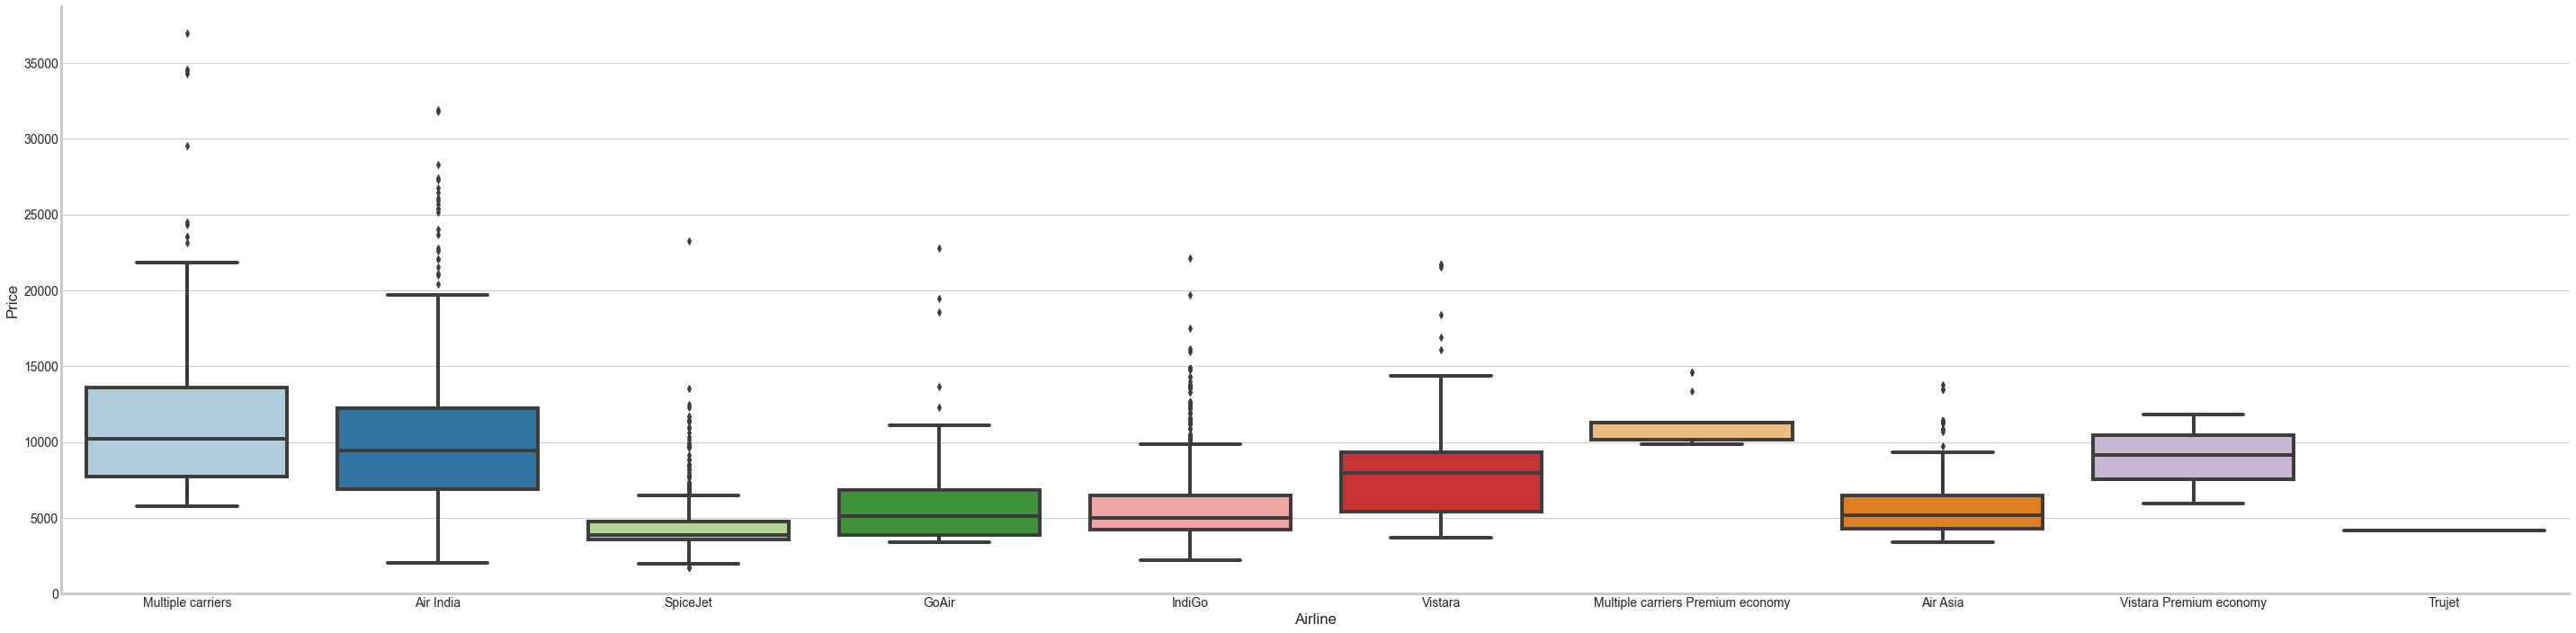

In [31]:
sns.catplot(x="Airline",y="Price",data=train_df.sort_values("Price",ascending=False),height=10,aspect=4,kind="box",palette="Paired")
plt.xlabel='Price'
plt.ylabel='Airline Names'
plt.title='Price vs Airline   '
plt.show()

#all are having almost similar median

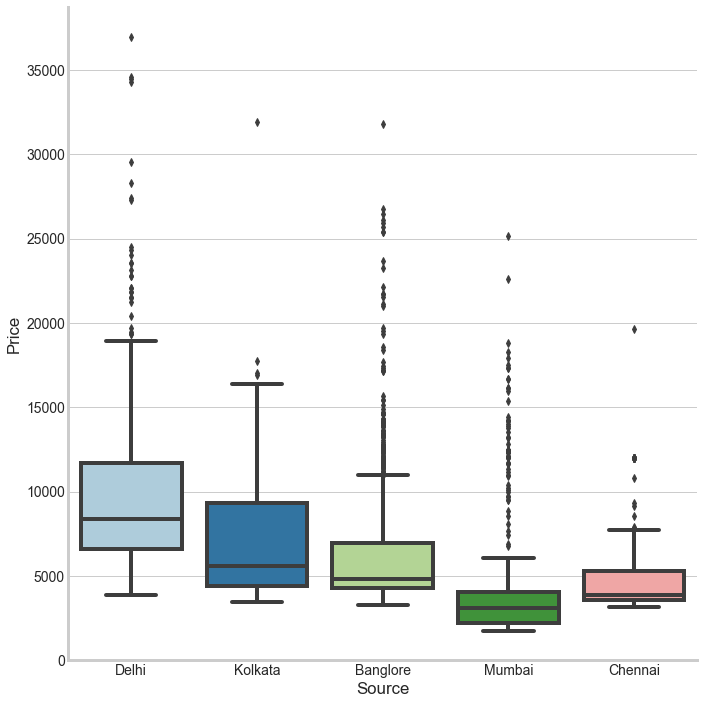

In [33]:
sns.catplot(x="Source",y="Price",height=10, data=train_df.sort_values("Price",ascending=False),kind="box",palette="Paired")

#from the graph we can see that there are a bit of outliers in Banglore Data

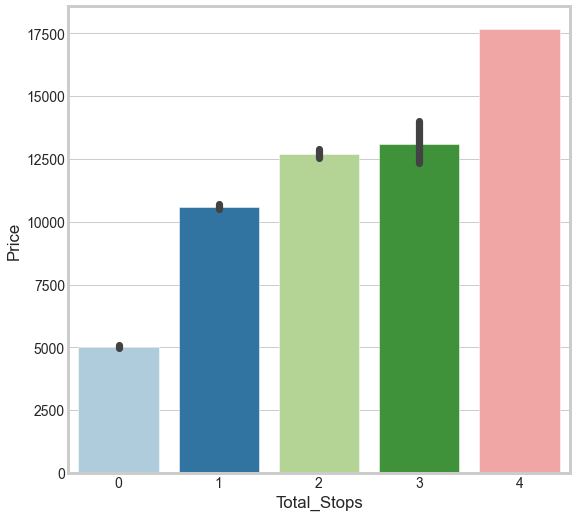

In [52]:
plt.figure(figsize=(8,8))
sns.barplot(x="Total_Stops",y="Price",data=train_df.sort_values("Price",ascending=False),palette="Paired")

<Figure size 1800x2160 with 0 Axes>

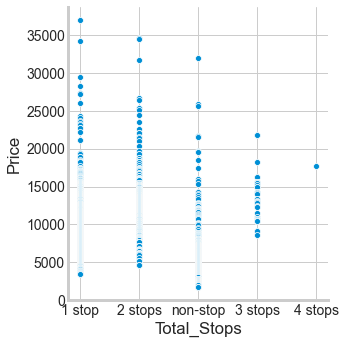

In [34]:
plt.figure(figsize=(25,30))
sns.relplot(x='Total_Stops',y='Price',data=train_df.sort_values('Price',ascending=False),palette='Paired')

#we can see that whenevr the stop increases price decreases

###  HANDLING CATEGORICAL FEATURES

In [35]:
train_df["Airline"].value_counts()

IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [36]:
#As the Airline is a Nominal Categorical Data we will perform One Hot Encoding
Airline = train_df["Airline"]
Airline =pd.get_dummies(Airline,drop_first=True)
Airline.head()

,Air India,GoAir,IndiGo,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0
5,0,0,0,0,0,1,0,0,0


In [37]:
df["Source"].value_counts()

NameError: name 'df' is not defined

In [38]:
#As Source is also an Nominal Categorical Data we gonna do One Hot Encoding
Source=train_df[["Source"]]
Source=pd.get_dummies(Source,drop_first=True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
3,0,0,1,0
4,0,0,0,0
5,0,0,1,0


In [39]:
train_df['Destination'].value_counts()

Cochin       2948
Banglore     1615
Delhi         895
New Delhi     510
Hyderabad     478
Kolkata       381
Name: Destination, dtype: int64

In [40]:
#As the Destination is an Nominal Categorical Data so we gonna do One Hot Encoding
Destination= train_df[['Destination']]
Destination=pd.get_dummies(Destination,drop_first=True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1
5,0,0,0,0,0


In [41]:
train_df.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Departure_Hour,Departure_Minute,Arrival_Hour,Arrival_Miutes,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,13,15,7,25
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,16,50,21,35,4,45
5,SpiceJet,Kolkata,Banglore,non-stop,3873,24,6,9,0,11,25,2,25


In [42]:
# As this is case of Ordinal Categorical type we gonna perform LabelEncoding
#replacing the Stops by allocating Numbers
train_df.replace({"non-stop":0,"1 stop":1,"2 stops":2,"3 stops":3, "4 stops":4},inplace=True)

In [43]:
train_df.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Departure_Hour,Departure_Minute,Arrival_Hour,Arrival_Miutes,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45
5,SpiceJet,Kolkata,Banglore,0,3873,24,6,9,0,11,25,2,25


In [44]:
#Concatinating dataframe ie.Destination,source,airline and train_data
data_train=pd.concat([train_df,Airline,Source,Destination],axis=1)

In [45]:
data_train.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Departure_Hour,Departure_Minute,Arrival_Hour,Arrival_Miutes,Duration_hours,Duration_mins,Air India,GoAir,IndiGo,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5,SpiceJet,Kolkata,Banglore,0,3873,24,6,9,0,11,25,2,25,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0


In [46]:
data_train.drop(['Airline',"Source", "Destination"], axis = 1, inplace = True)

In [47]:
data_train.head()

,Total_Stops,Price,Journey_day,Journey_month,Departure_Hour,Departure_Minute,Arrival_Hour,Arrival_Miutes,Duration_hours,Duration_mins,Air India,GoAir,IndiGo,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5,0,3873,24,6,9,0,11,25,2,25,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0


In [48]:
data_train.shape

(6827, 28)

###  TEST DATA

In [49]:
test_data=pd.read_excel("flight_test.xlsx")

In [50]:
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [53]:
test_data.shape

(1772, 10)

In [54]:
test_data.drop(index=test_data[test_data['Airline']=='Jet Airways' ].index,inplace=True)
test_data.drop(index=test_data[test_data['Airline']=='Jet Airways Business' ].index,inplace=True)

In [55]:
test_data.drop(["Additional_Info","Route"],axis=1,inplace=True)

In [56]:
test_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [57]:
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops
1,IndiGo,12/05/2019,Kolkata,Banglore,06:20,10:20,4h,1
3,Multiple carriers,21/05/2019,Delhi,Cochin,08:00,21:00,13h,1
4,Air Asia,24/06/2019,Banglore,Delhi,23:55,02:45 25 Jun,2h 50m,0
6,Air India,12/03/2019,Banglore,New Delhi,07:30,22:35,15h 5m,1
7,IndiGo,1/05/2019,Kolkata,Banglore,15:15,20:30,5h 15m,1


In [58]:
test_data["Journey_day"]=pd.to_datetime(test_data["Date_of_Journey"],format="%d/%m/%Y").dt.day
test_data["Journey_month"]=pd.to_datetime(test_data["Date_of_Journey"],format="%d/%m/%Y").dt.month
test_data.drop(["Date_of_Journey"],axis=1,inplace=True)


test_data["Departure_Time"]=pd.to_datetime(test_data["Dep_Time"]).dt.hour
test_data["Departure_minutes"]=pd.to_datetime(test_data["Dep_Time"]).dt.minute
test_data.drop(["Dep_Time"],axis=1,inplace=True)

test_data["Arrival_Hours"]=pd.to_datetime(test_data["Arrival_Time"]).dt.hour
test_data["Arrival_minutes"]=pd.to_datetime(test_data["Arrival_Time"]).dt.minute
test_data.drop(["Arrival_Time"],axis=1,inplace=True)

In [59]:
test_data.head()

,Airline,Source,Destination,Duration,Total_Stops,Journey_day,Journey_month,Departure_Time,Departure_minutes,Arrival_Hours,Arrival_minutes
1,IndiGo,Kolkata,Banglore,4h,1,12,5,6,20,10,20
3,Multiple carriers,Delhi,Cochin,13h,1,21,5,8,0,21,0
4,Air Asia,Banglore,Delhi,2h 50m,0,24,6,23,55,2,45
6,Air India,Banglore,New Delhi,15h 5m,1,12,3,7,30,22,35
7,IndiGo,Kolkata,Banglore,5h 15m,1,1,5,15,15,20,30


In [60]:

duration = list(test_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:   
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   
        else:
            duration[i] = "0h " + duration[i]          
duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))  
    
test_data["Duration_hours"] = duration_hours
test_data["Duration_mins"] = duration_mins
test_data.drop(["Duration"], axis = 1, inplace = True)

In [61]:
test_data.head()

,Airline,Source,Destination,Total_Stops,Journey_day,Journey_month,Departure_Time,Departure_minutes,Arrival_Hours,Arrival_minutes,Duration_hours,Duration_mins
1,IndiGo,Kolkata,Banglore,1,12,5,6,20,10,20,4,0
3,Multiple carriers,Delhi,Cochin,1,21,5,8,0,21,0,13,0
4,Air Asia,Banglore,Delhi,0,24,6,23,55,2,45,2,50
6,Air India,Banglore,New Delhi,1,12,3,7,30,22,35,15,5
7,IndiGo,Kolkata,Banglore,1,1,5,15,15,20,30,5,15


In [62]:
test_data.shape

(1772, 12)

In [63]:
test_data['Airline'].value_counts()

IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Vistara Premium economy                2
Name: Airline, dtype: int64

In [64]:
test_data.head()

,Airline,Source,Destination,Total_Stops,Journey_day,Journey_month,Departure_Time,Departure_minutes,Arrival_Hours,Arrival_minutes,Duration_hours,Duration_mins
1,IndiGo,Kolkata,Banglore,1,12,5,6,20,10,20,4,0
3,Multiple carriers,Delhi,Cochin,1,21,5,8,0,21,0,13,0
4,Air Asia,Banglore,Delhi,0,24,6,23,55,2,45,2,50
6,Air India,Banglore,New Delhi,1,12,3,7,30,22,35,15,5
7,IndiGo,Kolkata,Banglore,1,1,5,15,15,20,30,5,15


In [65]:
Airline = pd.get_dummies(test_data["Airline"], drop_first= True)
Source = pd.get_dummies(test_data["Source"], drop_first= True)
Destination = pd.get_dummies(test_data["Destination"], drop_first = True)

In [66]:
test_data.head()

,Airline,Source,Destination,Total_Stops,Journey_day,Journey_month,Departure_Time,Departure_minutes,Arrival_Hours,Arrival_minutes,Duration_hours,Duration_mins
1,IndiGo,Kolkata,Banglore,1,12,5,6,20,10,20,4,0
3,Multiple carriers,Delhi,Cochin,1,21,5,8,0,21,0,13,0
4,Air Asia,Banglore,Delhi,0,24,6,23,55,2,45,2,50
6,Air India,Banglore,New Delhi,1,12,3,7,30,22,35,15,5
7,IndiGo,Kolkata,Banglore,1,1,5,15,15,20,30,5,15


In [67]:
test_data.shape

(1772, 12)

In [68]:
test_data = pd.concat([test_data, Airline, Source, Destination], axis = 1)
test_data.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

In [69]:
test_data.head()

,Total_Stops,Journey_day,Journey_month,Departure_Time,Departure_minutes,Arrival_Hours,Arrival_minutes,Duration_hours,Duration_mins,Air India,GoAir,IndiGo,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
1,1,12,5,6,20,10,20,4,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,1,21,5,8,0,21,0,13,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,0,24,6,23,55,2,45,2,50,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
6,1,12,3,7,30,22,35,15,5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
7,1,1,5,15,15,20,30,5,15,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [70]:
test_data.shape

(1772, 26)

In [71]:
test_data.head()

,Total_Stops,Journey_day,Journey_month,Departure_Time,Departure_minutes,Arrival_Hours,Arrival_minutes,Duration_hours,Duration_mins,Air India,GoAir,IndiGo,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
1,1,12,5,6,20,10,20,4,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,1,21,5,8,0,21,0,13,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,0,24,6,23,55,2,45,2,50,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
6,1,12,3,7,30,22,35,15,5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
7,1,1,5,15,15,20,30,5,15,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0


###  FEATURE SELECTION

In [72]:
data_train.head()

,Total_Stops,Price,Journey_day,Journey_month,Departure_Hour,Departure_Minute,Arrival_Hour,Arrival_Miutes,Duration_hours,Duration_mins,Air India,GoAir,IndiGo,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5,0,3873,24,6,9,0,11,25,2,25,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0


In [73]:
data_train.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month',
       'Departure_Hour', 'Departure_Minute', 'Arrival_Hour', 'Arrival_Miutes',
       'Duration_hours', 'Duration_mins', 'Air India', 'GoAir', 'IndiGo',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Trujet', 'Vistara', 'Vistara Premium economy', 'Source_Chennai',
       'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi'],
      dtype='object')

In [74]:
X= data_train.loc[:,['Total_Stops', 'Journey_day', 'Journey_month',
       'Departure_Hour', 'Departure_Minute', 'Arrival_Hour', 'Arrival_Miutes',
       'Duration_hours', 'Duration_mins', 'Air India', 'GoAir', 'IndiGo',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Trujet', 'Vistara', 'Vistara Premium economy', 'Source_Chennai',
       'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi']]

In [75]:
X.shape

(6827, 27)

In [76]:
X.head()

,Total_Stops,Journey_day,Journey_month,Departure_Hour,Departure_Minute,Arrival_Hour,Arrival_Miutes,Duration_hours,Duration_mins,Air India,GoAir,IndiGo,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5,0,24,6,9,0,11,25,2,25,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0


In [77]:
y=data_train.loc[:,'Price']
y.head()

0     3897
1     7662
3     6218
4    13302
5     3873
Name: Price, dtype: int64

In [79]:
X.shape

(6827, 27)

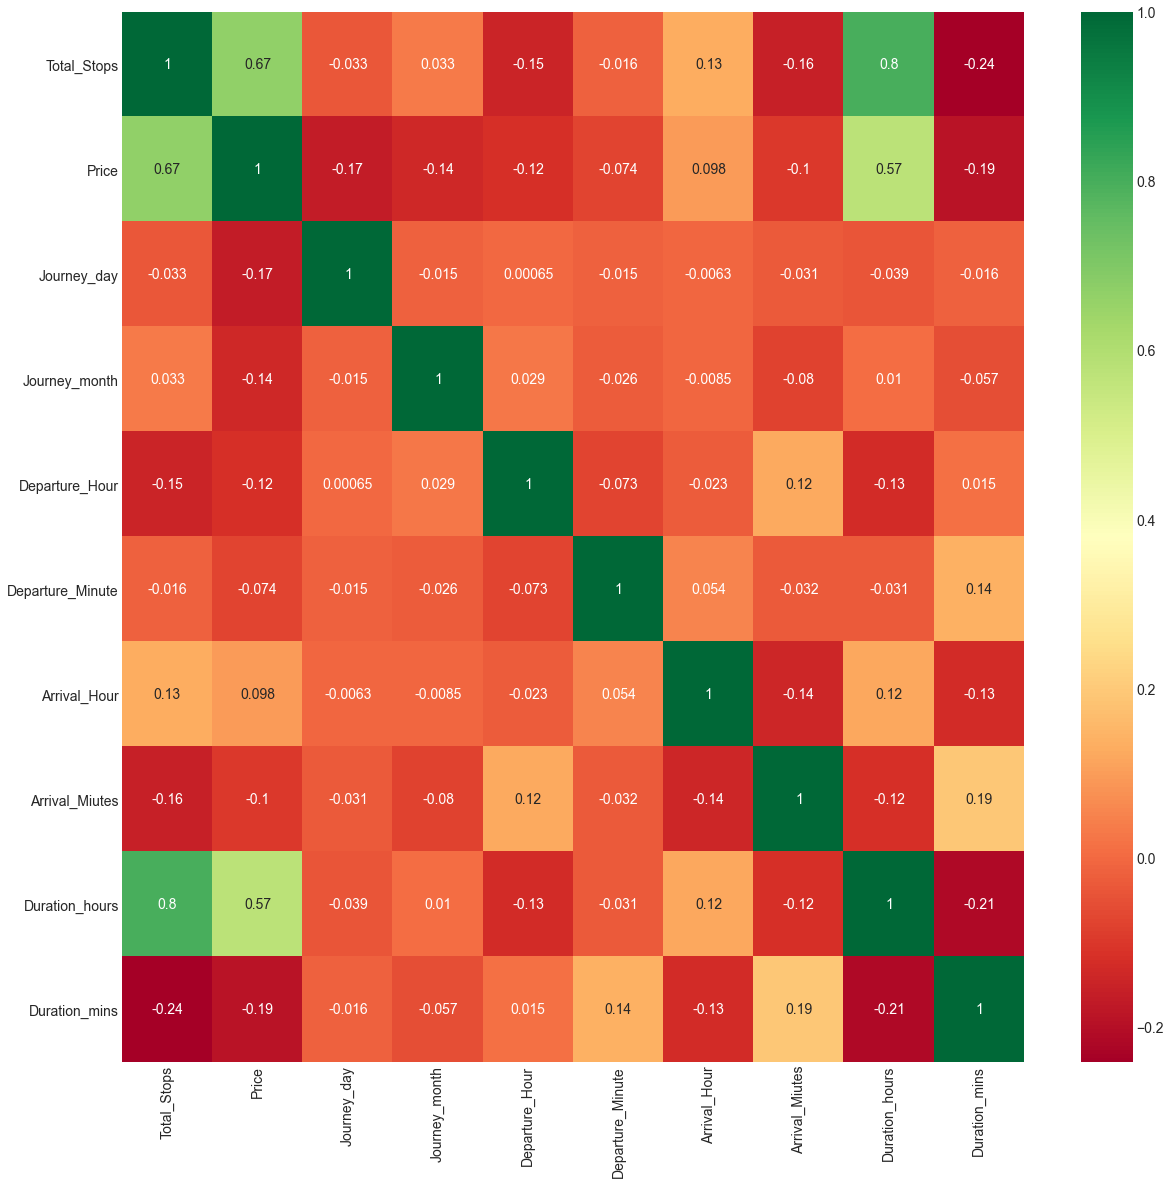

In [81]:
plt.figure(figsize=(18,18))
sns.heatmap(train_df.corr(),annot=True,cmap="RdYlGn")
plt.show()

In [82]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

In [84]:
print(selection.feature_importances_)

[2.64374772e-01 1.23072064e-01 7.20011384e-02 3.22845591e-02
 3.40963309e-02 3.11418427e-02 2.78978773e-02 1.54118086e-01
 2.48415349e-02 3.97934907e-02 3.34698254e-03 1.94089706e-02
 4.77185598e-02 2.05295361e-03 4.93913587e-03 1.82000005e-04
 1.24253650e-02 2.01553270e-04 1.06441848e-03 3.12863517e-02
 5.86200748e-03 3.86901615e-03 3.29801587e-02 1.83217139e-03
 4.28168524e-03 9.07050756e-04 2.40199236e-02]


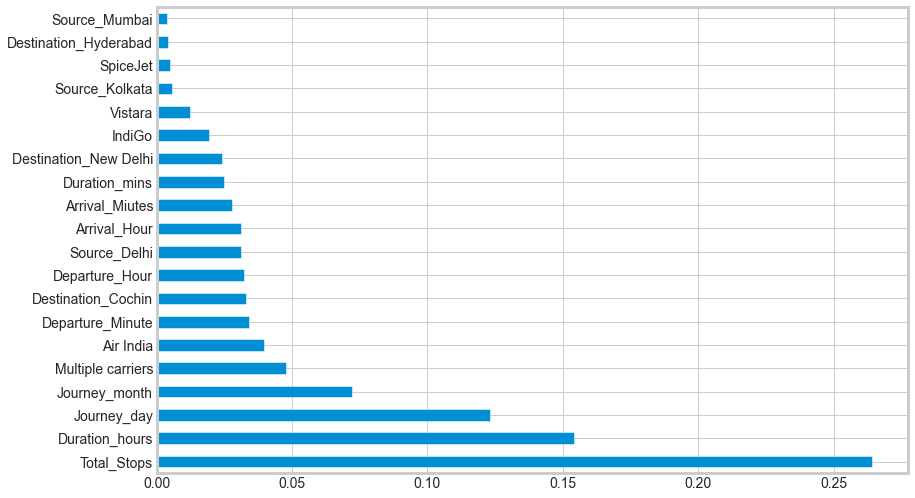

In [85]:
#plot graph of important feature for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

#from the graph we can see that total stops are playing mist important Feature

### MODEL TRAINING

In [86]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [87]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor()

In [88]:
y_pred = reg_rf.predict(X_test)

In [89]:
#R2 score for training Data
reg_rf.score(X_train, y_train)

0.9725155258516242

In [91]:
#Test Data Score
reg_rf.score(X_test, y_test)

0.8235293094517963

In [92]:
from sklearn import metrics

In [93]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 747.9911761169122
MSE: 2599486.3500668756
RMSE: 1612.2922657095628


In [94]:
metrics.r2_score(y_test, y_pred)

0.8235293094517963

### HYPER PARAMETER TUNNING

In [95]:
from sklearn.model_selection import RandomizedSearchCV

In [96]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [97]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [98]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [99]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=  18.4s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   18.3s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=  16.1s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=  16.0s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=  16.8s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=  16.7s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=  21.7s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   6.7s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   6.4s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   6.3s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   6.7s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   6.3s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 14.3min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [100]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [101]:
prediction = rf_random.predict(X_test)

In [102]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 820.8275652423487
MSE: 2612447.028152366
RMSE: 1616.306600912205


### SAVING THE MODEL 

In [130]:
import pickle
# open a file, where you want to store the data
file = open('flight_rf.pkl', 'wb')

# dump information to that file
pickle.dump(reg_rf, file)

In [131]:
model = open('flight_rf.pkl','rb')
forest = pickle.load(model)

In [132]:
y_prediction = forest.predict(X_test)

In [133]:
metrics.r2_score(y_test, y_prediction)

0.8235293094517963